# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city,
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
    # If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | santa ana
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | idrinskoye
Processing Record 9 of Set 1 | san angelo
Processing Record 10 of Set 1 | nadym
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | monrovia
Processing Record 14 of Set 1 | tromso
Processing Record 15 of Set 1 | pandan
Processing Record 16 of Set 1 | sandnessjoen
Processing Record 17 of Set 1 | tangalle
Processing Record 18 of Set 1 | newman
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | cutral-co
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | reggane
Processing Record 23 of Se

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,41.76,97,100,30.82,TF,1720634516
1,santa ana,33.7456,-117.8678,88.32,68,40,9.22,US,1720634316
2,georgetown,5.4112,100.3354,82.35,69,20,6.91,MY,1720634320
3,waitangi,-43.9535,-176.5597,46.81,91,100,11.99,NZ,1720634370
4,ribeira grande,38.5167,-28.7000,79.20,57,20,14.00,PT,1720634522


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,41.76,97,100,30.82,TF,1720634516
1,santa ana,33.7456,-117.8678,88.32,68,40,9.22,US,1720634316
2,georgetown,5.4112,100.3354,82.35,69,20,6.91,MY,1720634320
3,waitangi,-43.9535,-176.5597,46.81,91,100,11.99,NZ,1720634370
4,ribeira grande,38.5167,-28.7000,79.20,57,20,14.00,PT,1720634522


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

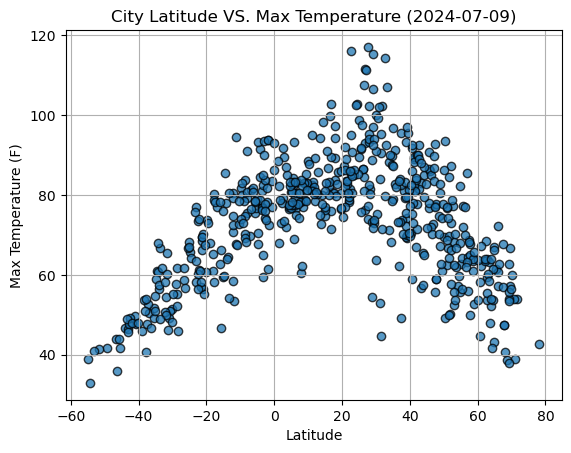

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude VS. Max Temperature (2024-07-09)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

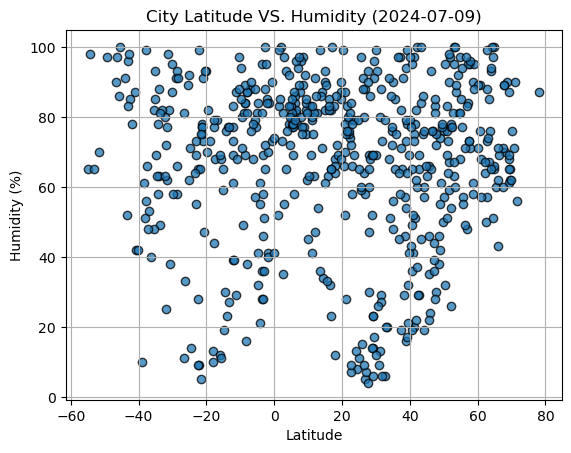

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude VS. Humidity (2024-07-09)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

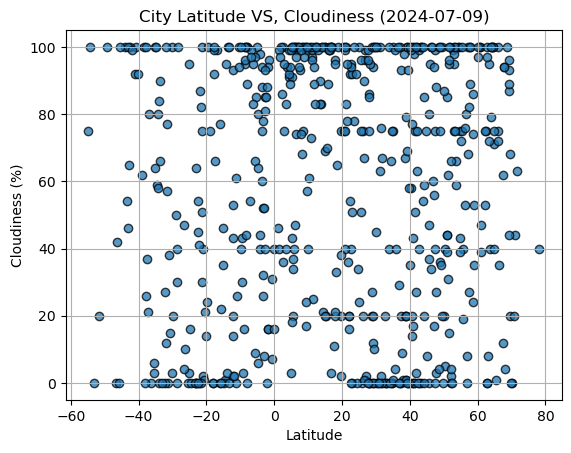

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude VS, Cloudiness (2024-07-09)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

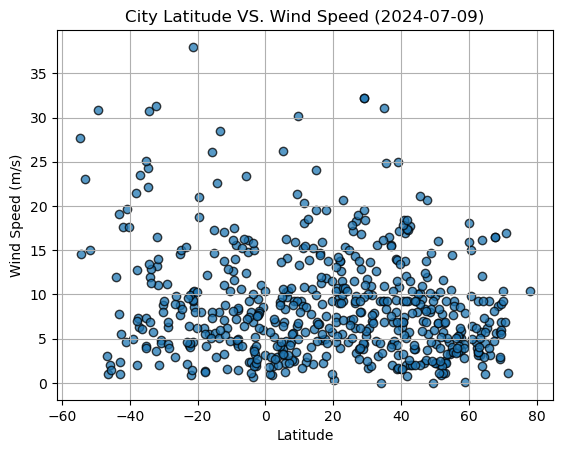

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude VS. Wind Speed (2024-07-09)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, hemisphere, xlabel, ylabel, title, coordinates):
    (slope, intercept, rvalue, pvlaue, stderr) = lineregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y= {slope:.2f}x + {intercept:.2f}"

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,santa ana,33.7456,-117.8678,88.32,68,40,9.22,US,1720634316
2,georgetown,5.4112,100.3354,82.35,69,20,6.91,MY,1720634320
4,ribeira grande,38.5167,-28.7000,79.20,57,20,14.00,PT,1720634522
5,tiksi,71.6872,128.8694,53.98,56,63,1.07,RU,1720634385
6,idrinskoye,54.3708,92.1358,59.72,81,100,3.27,RU,1720634525


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,41.76,97,100,30.82,TF,1720634516
3,waitangi,-43.9535,-176.5597,46.81,91,100,11.99,NZ,1720634370
9,puerto natales,-51.7236,-72.4875,41.45,70,20,14.97,CL,1720634529
17,papatowai,-46.5619,169.4708,43.92,90,0,3.00,NZ,1720634540
18,cutral-co,-38.9469,-69.2089,45.91,10,62,5.01,AR,1720634542


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.32


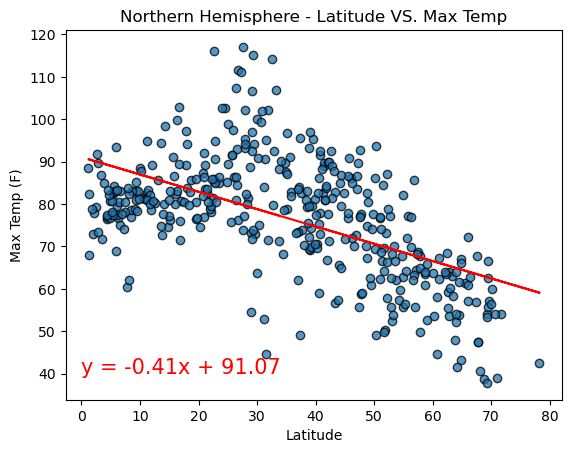

In [16]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Max Temp"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(northern_df["Lat"], northern_df["Max Temp"], edgecolors="black", alpha=0.75)
plt.plot(northern_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0, 40), fontsize=15, color="red")

plt.title("Northern Hemisphere - Latitude VS. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"The r^2-value is: {rvalue**2:.2f}")

plt.show()

The r^2-value is: 0.72


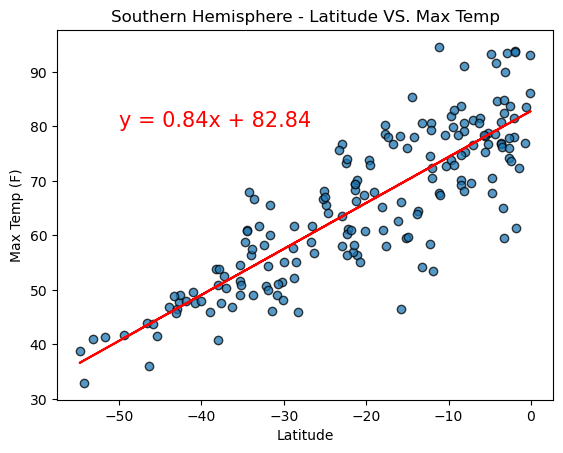

In [17]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Max Temp"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(southern_df["Lat"], southern_df["Max Temp"], edgecolors="black", alpha=0.75)
plt.plot(southern_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")

plt.title("Southern Hemisphere - Latitude VS. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"The r^2-value is: {rvalue**2:.2f}")

plt.show()

**Discussion about the linear relationship:** The lines of regression are showing that the Northern Hemisphere and Southern Hemisphere mirror the Max Temperature of the other. In the Northern Hemisphere, as the latitude increases the Max Temp decreases. In the Southern Hemisphere, as the latitude decreases the Max Temp also decreases.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.00075


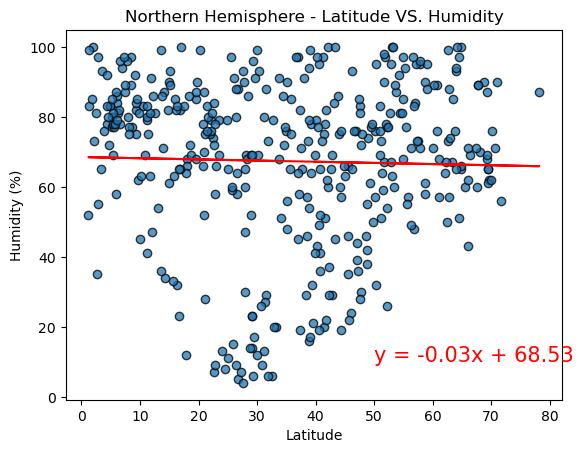

In [18]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Humidity"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(northern_df["Lat"], northern_df["Humidity"], edgecolors="black", alpha=0.75)
plt.plot(northern_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (50, 10), fontsize=15, color="red")

plt.title("Northern Hemisphere - Latitude VS. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r^2-value is: {rvalue**2:.5f}")

plt.show()

The r^2-value is: 0.01285


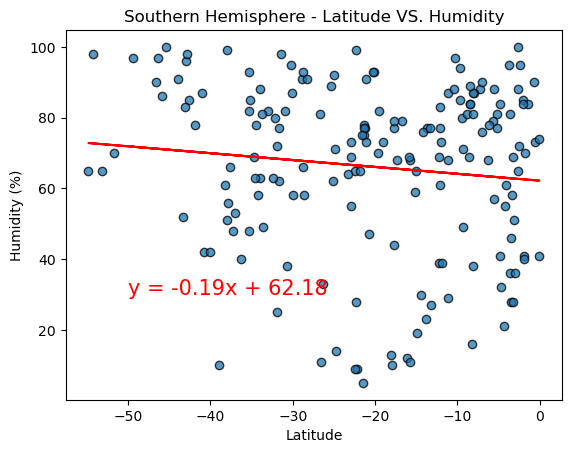

In [19]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Humidity"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(southern_df["Lat"], southern_df["Humidity"], edgecolors="black", alpha=0.75)
plt.plot(southern_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50, 30), fontsize=15, color="red")

plt.title("Southern Hemisphere - Latitude VS. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r^2-value is: {rvalue**2:.5f}")

plt.show()

**Discussion about the linear relationship:** The linear relationship of Latitude versus Humidity in the Northern versus Southern Hemispheres is interesting because it is not mirrored like it was with the max temperature. Instead, as the latitude decreases the humidity increases in both hemispheres. The line of regression is more drastic in the Southern Hemisphere while it is very tame in the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0129


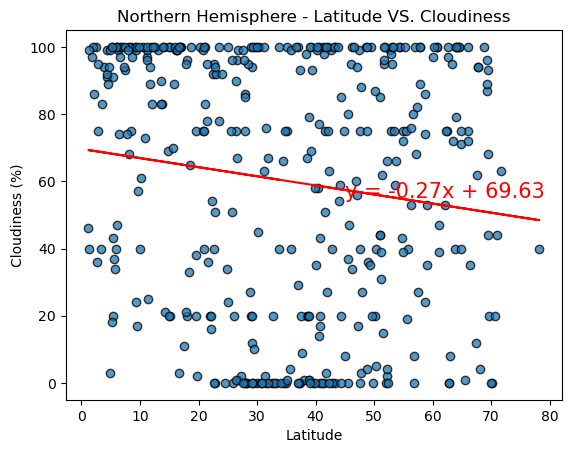

In [20]:
# Northern Hemisphere
(slope, intercept, revalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Cloudiness"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(northern_df["Lat"], northern_df["Cloudiness"], edgecolors="black", alpha=0.75)
plt.plot(northern_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (45, 55), fontsize=15, color="red")

plt.title("Northern Hemisphere - Latitude VS. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r^2-value is: {rvalue**2:.4f}")

plt.show()

The r^2-value is: 0.0129


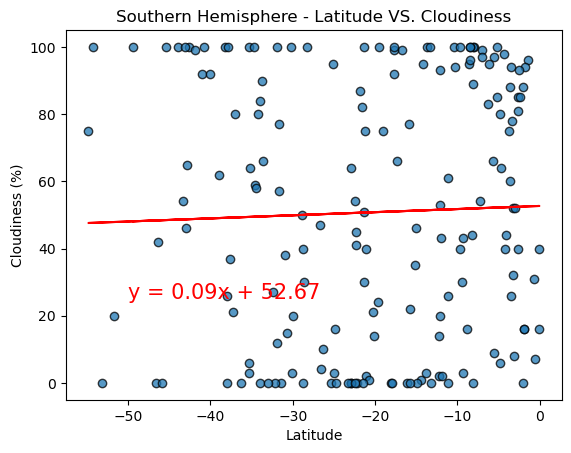

In [21]:
# Southern Hemisphere
(slope, intercept, revalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Cloudiness"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(southern_df["Lat"], southern_df["Cloudiness"], edgecolors="black", alpha=0.75)
plt.plot(southern_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50, 25), fontsize=15, color="red")

plt.title("Southern Hemisphere - Latitude VS. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r^2-value is: {rvalue**2:.4f}")

plt.show()

**Discussion about the linear relationship:** The linear regression line for the North and South Hemispheres are mirrors of each other. As the Latitude increases in the North, the Cloudiness decreases. As the Latitude increases in the South, the Cloudiness increases. The line of regression is two times steeper in the North than in the South. However, there is a wide spread of values for both scatter plots.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0145


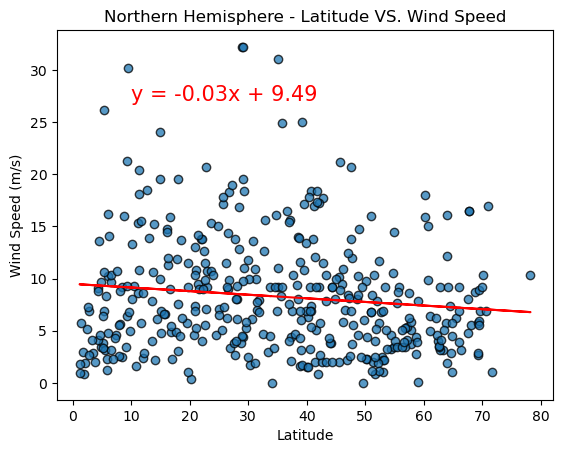

In [27]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Wind Speed"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(northern_df["Lat"], northern_df["Wind Speed"], edgecolors="black", alpha=0.75)
plt.plot(northern_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (10, 27), fontsize=15, color="red")

plt.title("Northern Hemisphere - Latitude VS. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

print(f"The r^2-value is: {rvalue**2:.4f}")

The r^2-value is: 0.0449


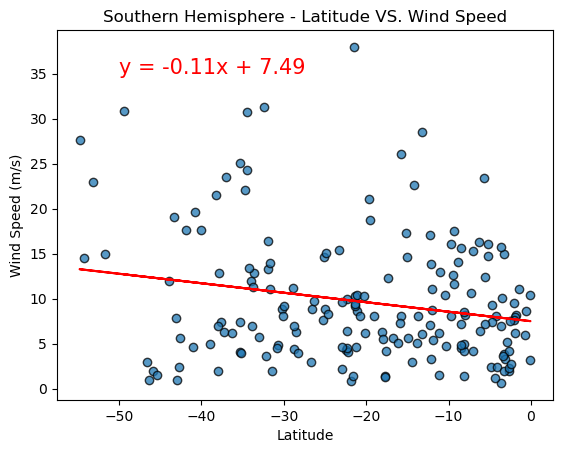

In [31]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Wind Speed"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(southern_df["Lat"], southern_df["Wind Speed"], edgecolors="black", alpha=0.75)
plt.plot(southern_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50, 35), fontsize=15, color="red")

plt.title("Southern Hemisphere - Latitude VS. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

print(f"The r^2-value is: {rvalue**2:.4f}")

**Discussion about the linear relationship:** As the Latitude increases, the Wind Speed decreases. This is true for both the Northern and Southern Hemisphere. The regression line in much steeper in the South than in the North. The values are more consistent and have a stronger correlation than the relationship between Latitude and Cloudiness.